# Capstone Webscrapping using BeautifulSoup

This project is used to learning about getting an information from the website. The output from this project not only for getting the information, but also preparing the dataset and visualize it into a simple dasboard using Flask library.

This following requirement for running this code:
- Install `beautifulSoup4`
- Install `pandas`
- Install `flask`
- Install `matplotlib`



Before getting a request from the website, we should import `requests` first. Then, get the request to the website using `requests.get()`

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

If the requests to website works, we can see use `.content`. Then, slice it for getting better visualization of html code from the page and we can also see full of html code.

In [3]:
url_get.content[0:777]

b'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t'

As we can see we get a very unstructured and complex html code, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1000 character. 

In [5]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [6]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. To find the key from the website, we should use inspect html from our browser. Select any particular information from the webpage, then see the key such as `div`, `span` and others. Don't forget to attach the `class` tag if there is a key using `class` tag on the html.


This case we are going to getting an information from Imdb webpage. So, after we inspect the html we find `div` with `attrs={'class':'article'}` for getting main information. The main information putted into `main_webpage` object. Then, we try to print the main information which located in `main_webpage` using `prettify()` until a thousands character

In [11]:
main_webpage = soup.find('div', attrs={'class':'article'})
print(main_webpage.prettify()[:1000])

<div class="article">
 <h1 class="header">
  Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending)
 </h1>
 <div class="nav">
  <br class="clear"/>
  <div class="display-mode float-right">
   View Mode:
   <a class="compact" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;view=simple">
    Compact
   </a>
   <span class="ghost">
    |
   </span>
   <a class="detailed" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;view=advanced">
    <strong>
     Detailed
    </strong>
   </a>
  </div>
  <div class="desc">
   <span>
    1-50 of 324,668 titles.
   </span>
   <span class="ghost">
    |
   </span>
   <a class="lister-page-next next-page" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;start=51">
    Next »
   </a>
  </div>
 </div>
 <br class="clear"/>
 <div class="sorting">
  Sort by:
  <a href="/search/title/?release_date=2019-01-01,2019-12-31&amp;sort=moviemeter,desc">
   <strong>
    Popularity
   </strong>
   ▲
  </a>
  <span 

Before we are going to catch the specific information from each movie, we should to try catch the second_information tag first. Let's check the code below:

- Using `find_all()` for getting the all information from html which located in `div` tag with `attrs={'class':'lister-item-content'}`
- Slicing the `box_movie` object for getting 0 index value

In [13]:
box_movie = soup.find_all('div', attrs={'class':'lister-item-content'})
box_movie[0]

<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt1312171/">The Umbrella Academy</a>
<span class="lister-item-year text-muted unbold">(2019– )</span>
</h3>
<p class="text-muted">
<span class="runtime">60 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Comedy            </span>
</p>
<div class="ratings-bar">
<div class="inline-block ratings-imdb-rating" data-value="8" name="ir">
<span class="global-sprite rating-star imdb-rating"></span>
<strong>8.0</strong>
</div>
<div class="inline-block ratings-user-rating">
<span class="userRatingValue" data-tconst="tt1312171" id="urv_tt1312171">
<span class="global-sprite rating-star no-rating"></span>
<span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
</span>
<div class="starBarWidget" id="sb_tt1312171">
<div class="rating rating-list" data-auth="" data-ga-identifier="" data-starbar-cl

This code below is used to scraping the all information that we need. 

- First, make an iteration in `box_webpage` with `div` tags and `attrs={'class':'lister-item-content'}`. From all information that we get from box_webpage, try to get the title of movies using `.text` with `a` tags. So, we only get the character without the html tags. After that, doing the same with rating of movies.

- Second, for getting the metascore information, it's a little bit different with the previous code. Use the `find()` then put the `span` tags and `attrs={'class':'metascore favorable'}`. Use the logical statements such as `if-else` because there are several movies do not have a metascore information. So, if the `metascore_movie` is None it will return None Value. Otherwise, it will return metascore.

In [14]:
temp = []

for i in range(0, len(box_movie)):
    box_webpage = main_webpage.find_all('div', attrs={'class':'lister-item-content'})[i]
    
    #Get Title
    title_movie = box_webpage.find_all('a')[0].text

    #Get Rating
    rating_movie = box_webpage.find_all('strong')[0].text

    #Get Metascore
    metascore_movie = box_webpage.find('span', attrs={'class':'metascore favorable'})
    if metascore_movie is not None:
        metascore_movie = metascore_movie.text.strip()
    else:
        metascore_movie = None
        
    #Get Movie Votes
    movie_votes = box_webpage.find_all('span', attrs={'name':'nv'})[0].text

    temp.append((title_movie,rating_movie,metascore_movie,movie_votes))

temp[0]

('The Umbrella Academy', '8.0', None, '112,893')

Check the number of `temp` ! It should 50 elements

In [15]:
len(temp)

50

Finally, we are getting the information through DataFrame but we still doing a pre-preocessing for getting better data.

In [18]:
import pandas as pd

dataset_movie = pd.DataFrame(temp, columns = ('Title_Movie', 'Imdb_Rating', 'Metascore', 'Movie_Votes'))
dataset_movie.head()

,Title_Movie,Imdb_Rating,Metascore,Movie_Votes
0,The Umbrella Academy,8.0,None,"112,893"
1,The Boys,8.7,None,"157,060"
2,Knives Out,7.9,82,"360,810"
3,Watchmen,8.1,None,"74,598"
4,Euphoria,8.3,None,"44,587"


Check the types of the column first using `.dtypes` for getting the data types information in each column

In [19]:
dataset_movie.dtypes

Title_Movie    object
Imdb_Rating    object
Metascore      object
Movie_Votes    object
dtype: object

This code below is used to changing the types of data in several column. First using `.apply()` for replacing "," to "." . Then, use `pd.to_numeric()` for changing the column into numeric types. Then, another column should change into float64 data types

In [22]:
dataset_movie['Movie_Votes'] = dataset_movie['Movie_Votes'].apply(lambda x: x.replace(',','.'))
dataset_movie['Metascore'] = pd.to_numeric(dataset_movie['Metascore'], errors='coerce')
dataset_movie[['Imdb_Rating','Movie_Votes']] = dataset_movie[['Imdb_Rating','Movie_Votes']].astype('float64')

Check The data types again to ensure that the code above is working

In [23]:
dataset_movie.dtypes

Title_Movie     object
Imdb_Rating    float64
Metascore      float64
Movie_Votes    float64
dtype: object

Here we go, we are going to use the bar plot for visualize the Top 7 Movies by considering the Amount of Votes that given from viewer's. 

I use my judgment by looking at the number of votes the audience sees because a film will be considered be a good film if it's judged by the audience. Sometimes the rating given does not necessarily reflect that the film is good. Therefore, I use votes from the audience as a form of view of what film is the best 7 according to the audience vote

AxesSubplot(0.125,0.125;0.775x0.755)


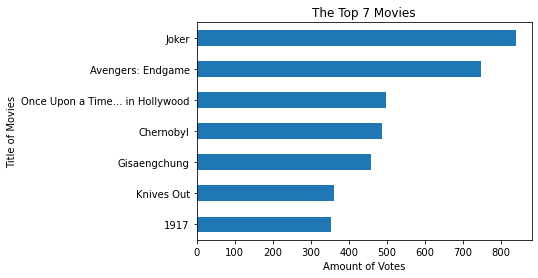

In [28]:
import matplotlib.pyplot as plt

top_7movie = dataset_movie.sort_values(by=['Movie_Votes'], ascending=False).head(7)

top_7movie = top_7movie.set_index('Title_Movie')

ax = top_7movie['Movie_Votes'].sort_values(ascending=True).plot(kind='barh', title='The Top 7 Movies')
ax.set_xlabel('Amount of Votes')
ax.set_ylabel("Title of Movies")

print(ax)



then put your flask dashboard link here too.